In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import pandas as pd
from PIL import Image


In [74]:
train_csv = pd.read_csv("train.csv")
label_to_int_map = {
    'bright dune':0,
    'dark dune':1,
    'spider':2,
    'impact ejecta':3,
    'slope streak':4,
    'swiss cheese':5,
    'crater':6,
    'other':7
}

int_to_label_map = {v:k for k, v in label_to_int_map.items()}
int_to_label_map

{0: 'bright dune',
 1: 'dark dune',
 2: 'spider',
 3: 'impact ejecta',
 4: 'slope streak',
 5: 'swiss cheese',
 6: 'crater',
 7: 'other'}

In [23]:
file_names, labels = train_csv['File Name'], train_csv['Class']
pd.set_option('future.no_silent_downcasting', True)
labels_int = labels.replace(label_to_int_map)

In [22]:
freq = labels_int.value_counts()

0          1.jpg
1          2.jpg
2          3.jpg
3          4.jpg
4          5.jpg
          ...   
6196    6197.jpg
6197    6198.jpg
6198    6199.jpg
6199    6200.jpg
6200    6201.jpg
Name: File Name, Length: 6201, dtype: object

In [38]:
new_file_names = []
for file_name in file_names:
    new_file_names.append("train_dataset/" + file_name)

new_file_names = pd.Series(new_file_names)
final_images_df = pd.concat([new_file_names, labels_int], axis=1)

In [39]:
class MarsImgDataset(Dataset):
    def __init__(self, img_df, transform = None):
        super().__init__()
        self.frame = img_df
        self.transform = transform

    def __len__(self):
        return len(self.frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.frame.iloc[idx, 0]
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        label = self.frame.iloc[idx, 1]
        sample = (image, label)
        
        return sample

In [77]:
IMAGE_SIZE = (227, 227)
data_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),

    ])

train_dataset = MarsImgDataset(final_images_df, data_transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)

Text(0.5, 1.0, 'crater')

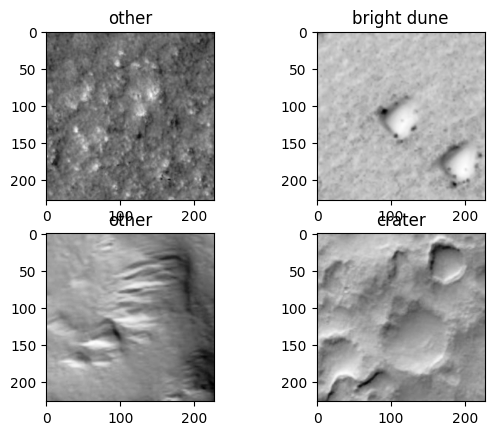

In [86]:
img, label = next(iter(train_loader))

figure, axis = plt.subplots(2,2)

axis[0,0].imshow(img[0].permute(1,2,0), cmap = 'Greys_r')
axis[0,0].set_title(int_to_label_map[label[0].item()])

axis[0,1].imshow(img[1].permute(1,2,0), cmap = 'Greys_r')
axis[0,1].set_title(int_to_label_map[label[1].item()])

axis[1,0].imshow(img[2].permute(1,2,0), cmap = 'Greys_r')
axis[1,0].set_title(int_to_label_map[label[2].item()])

axis[1,1].imshow(img[3].permute(1,2,0), cmap = 'Greys_r')
axis[1,1].set_title(int_to_label_map[label[3].item()])
